In [ ]:
# this block is just for us on colabs, run this once on startup
# all blocks below this are "the lab"
from google.colab import drive
drive.mount('/content/drive/')

# install python package software
!pip install netCDF4
!pip install cartopy
!pip install metpy

Mounted at /content/drive/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.9/409.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 14.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br>

# **ATSC-405 - NUMERICAL METHODS IN METEOROLOGY | LAB 2**

--------

## **Objectives**: Practice loading data from a netcdf file and creating simple maps with Python


##### Welcome!

The goal of this week’s lab assignment is for you to become familiar with working on the NCAR Derecho Supercomputer and learning the basics of loading numerical weather model data and creating maps in JupyterHub (i.e., Python). We will be analyzing 12-km horizontal grid spacing NAM model data at model initialization time (t = 0, which in this case was 00 UTC 13 April 2022) for the April 2022 blizzard and severe weather event across the Northern Plains.

Carefully read through and run each cell below. Some cells will require editing to successfully run and complete the lab.

<br>

*(C) Jordan Christian (jordan.christian@und.edu), Kyle Gillett (kyle.gillett@und.edu) 2024*

-----
<br>
<br>
<br>

## **IMPORT SOFTWARE PACKAGES**

Run this cell to import Python code packages that will help us load some data, process the data, conduct math operations, and build some maps.

In [ ]:
import netCDF4                      # netCDF4 allows us to neatly access and store .netcdf file data
import numpy as np                  # simple python math operations
import cartopy.crs as ccrs          # cartopy coordinate refrence system, from cartopy, for mapping -- to turn a matplotlib axis into a geoaxis (map)
import cartopy.feature as cfeature  # cartopy features, from cartopy, for mapping -- add map components to a map (borders, states, oceans, rivers, etc)
import matplotlib.pyplot as plt     # matplotlib for plotting figures, axes, graphs, etc
import metpy.calc as mpcalc         # metpy.calc provides a number of simple meteorological equations for computing variables
import scipy.ndimage as ndimage     # scipy ndimage data filtering/smoothing -- make the data 'prettier'

print('[+] software packages imported...')

[+] software packages imported...


-----
<br>

## **LOAD THE DATA INTO A NETCDF4 DATASET**

Run the cell below to load a `netcdf4.Dataset()`. This function, from the `netcdf4` library reads the .nc file and neatly stores the data in a `Dataset` by which we can easily access the data for later use!

In [ ]:
# declare the `filename` variable as the path and file name to the .nc file we want to access
# netcdf_file = 'nam_218_20220413_0000_000.nc'
netcdf_file = '/content/drive/MyDrive/atsc405-labs-workspace/Lab 2/nam_218_20220413_0000_000.nc'

# tell the `netCDF4` library to make a `netCDF4.Dataset()` from the .nc file you provided above, and store it
# under the variable `nc_dataset`
nc_dataset = netCDF4.Dataset(netcdf_file)

print('[+] netcdf4 dataset created...')

[+] netcdf4 dataset created...


------
<br>


## **EXPLORE ASPECTS OF THE DATASET**

A `netCDF4.Dataset()` contains a TON of information. This will be the data itself, that may be 2D (lat, lon), 3D (lat, lon, z), or 4D (lat, lon, z, t), all of the data's coordinates (lat, lon, z, t), variable metadata (units, full name, etc) and more.

- Lets investigate your `netCDF4.Dataset()`. Variables are stored in the dataset by "key" names. We can start by using `.variables.keys()` to list all of the variable key names available in the dataset. Doing this first is a great way to figure out the 'naming pattern' of the variables.

- Then, lets investigate one of those variables to familiarize yourself with the structure of a `netCDF4.Dataset`. Do this by 'indexing' your dataset by variable key name, i.e. `['variable-name']`

In [ ]:
# print a list of variables within your netCDF4 dataset
nc_dataset.variables.keys()

dict_keys(['TMP_P0_L1_GLC0', 'TMP_P0_L7_GLC0', 'TMP_P0_L100_GLC0', 'TMP_P0_L103_GLC0', 'TMP_P0_2L108_GLC0', 'DPT_P0_L103_GLC0', 'LHTFL_P0_L1_GLC0', 'SHTFL_P0_L1_GLC0', 'SPFH_P0_L103_GLC0', 'RH_P0_L4_GLC0', 'RH_P0_L100_GLC0', 'RH_P0_L103_GLC0', 'RH_P0_2L104_GLC0', 'RH_P0_2L108_GLC0', 'PWAT_P0_L200_GLC0', 'SNOD_P0_L1_GLC0', 'WEASD_P0_L1_GLC0', 'CRAIN_P0_L1_GLC0', 'CFRZR_P0_L1_GLC0', 'CICEP_P0_L1_GLC0', 'CSNOW_P0_L1_GLC0', 'SNOWC_P0_L1_GLC0', 'UGRD_P0_L6_GLC0', 'UGRD_P0_L7_GLC0', 'UGRD_P0_L100_GLC0', 'UGRD_P0_L103_GLC0', 'UGRD_P0_2L108_GLC0', 'UGRD_P0_L220_GLC0', 'VGRD_P0_L6_GLC0', 'VGRD_P0_L7_GLC0', 'VGRD_P0_L100_GLC0', 'VGRD_P0_L103_GLC0', 'VGRD_P0_2L108_GLC0', 'VGRD_P0_L220_GLC0', 'VVEL_P0_L100_GLC0', 'DZDT_P0_L100_GLC0', 'ABSV_P0_L100_GLC0', 'VUCSH_P0_2L103_GLC0', 'VVCSH_P0_2L103_GLC0', 'GUST_P0_L1_GLC0', 'CD_P0_L1_GLC0', 'FRICV_P0_L1_GLC0', 'VRATE_P0_L220_GLC0', 'PRES_P0_L1_GLC0', 'PRES_P0_L6_GLC0', 'PRES_P0_L7_GLC0', 'PRES_P0_L103_GLC0', 'PRMSL_P0_L101_GLC0', 'HGT_P0_L1_GLC0', 'HGT_

In [ ]:
# index the dataset by a variable key name
# after running this, you'll see the metadata for geopotential heights
nc_dataset['HGT_P0_L100_GLC0']

<class 'netCDF4._netCDF4.Variable'>
float32 HGT_P0_L100_GLC0(lv_ISBL0, ygrid_0, xgrid_0)
    initial_time: 04/13/2022 (00:00)
    forecast_time_units: hours
    forecast_time: 0
    level_type: Isobaric surface (Pa)
    parameter_template_discipline_category_number: [0 0 3 5]
    parameter_discipline_and_category: Meteorological products, Mass
    grid_type: Lambert Conformal can be secant or tangent, conical or bipolar
    coordinates: gridlat_0 gridlon_0
    _FillValue: 1e+20
    units: gpm
    long_name: Geopotential height
    production_status: Operational products
    center: US National Weather Service - NCEP (WMC)
unlimited dimensions: 
current shape = (39, 428, 614)
filling on

Great! You can now see lots of useful info about the variable above. You can see info such as...

- full variable name (`long_name`)
- units (`units`)
- the inital valid time (`inital_time`)
- forecast hours (`forecast_time`)
- vertical coordinate type (`level_type`)
- horizontal coordinates (`coordinates`)
- the 'shape' of the variable (`shape`)

The 'shape' is important! It's telling us the dimensions of the variable.
For example, the shape of `HGT_P0_L100_GLC0` is `(39, 428, 614)` which means the data spans 39 levels into the vertical in the z-direction, it spans 428 longitude points in the x-direction and it spans 619 latitude points in the y-direction

-----

<br>

## **EXTRACT COORDINATE DATA FROM THE DATASET**

Running the cells below extracts useful data from our `netCDF4.Dataset` that we can use to plot data on maps.

First we can extract useful coordinate information like longitude, latitude, and pressure (x, y, z)

In [ ]:
# CREATE A LAT & LON VARIABLE
# `gridlat_0` and `gridlon_0` are the variable names for lat & lon in the dataset
# 'slice' the dataset for those variables
lats = nc_dataset['gridlat_0'][:] # units = deg
lons = nc_dataset['gridlon_0'][:] # units = deg


# CREATE A PRESSURE-LEVELS VARIABLE
# `lv_ISBL0` represents the 'isobaric pressure levels' variable in this dataset, which is the vertical coordinate.
# If we want to pick out data at the 500hPa level, for example, we need to store the pressure levels into a variable
# 'slice' the dataset for that variable
pres_levs = nc_dataset['lv_ISBL0'][:] # units = Pa
pres_levs = pres_levs / 100 # convert pressure from Pa to hPa


# ADDITIONAL METADATA
# create a neatly formatted date-time `str` for the valid data time
nc_date = nc_dataset['HGT_P0_L100_GLC0'].initial_time
valid_date = f'{nc_date[0:10]} {nc_date[12:14]}:{nc_date[15:17]}Z'
# we know from the filename that this is NAM data, we can define this manually
model = 'NAM'

print(f'[+] some dataset metadata... date/time: {valid_date}, model: {model}')
print(f'[+] lat/lon/plevs data extraction complete, the lat-lon grid = {lats.shape}, and the vertical pressure level grid = {pres_levs.shape}...')

[+] some dataset metadata... date/time: 04/13/2022 00:00Z, model: NAM
[+] lat/lon/plevs data extraction complete, the lat-lon grid = (428, 614), and the vertical pressure level grid = (39,)...


-----
<br>

## **EXTRACT THE DATA FROM THE DATASET**

Running the cells below extracts useful data from our `netCDF4.Dataset` that we can use to plot data on maps.

Now we can extract the actual data we want from the `netCDF2.Dataset()`, stuff like geopotential height, temperature, wind components, etc.

 - First we'll grab *isobaric* variables, meaning they are *3D* variables (x, y, z), where x is lon, y is lat, and z is pressure!

 - Next we will grab *surface variables*, meaning these are just 2D (x & y).


 Note: The function *ndimage.gaussian_filter* is applied to the variables to smooth the data.

In [ ]:
#################################
# ISOBARIC VARIABLES
# (with vertical coordinates)
#################################
# extract *isobaric* geopotential height
ghgt_iso = ndimage.gaussian_filter(nc_dataset['HGT_P0_L100_GLC0'][:], sigma=2)

# extract *isobaric* temperature
temp_iso = ndimage.gaussian_filter(nc_dataset['TMP_P0_L100_GLC0'][:], sigma=2) - 273.15 # convert from K to C

# extract *isobaric* u-component of the wind
uwnd_iso = ndimage.gaussian_filter(nc_dataset['UGRD_P0_L100_GLC0'][:], sigma=2) * 1.94384 # convert from m/s to knots

# extract *isobaric* v-component of the wind and convert from m/s to knots
vwnd_iso = ???

print('[+] data variable extraction complete...')

[+] data variable extraction complete...


In [ ]:
#################################
# SURFACE / FULL COLUMN VARIABLES
# (no vertical coordinates)
#################################

# extract *full column* composite reflectivity (no vertical coordinate)
# take an extra step here and 'mask' or 'clip' values less than 5 dBz
rfct = ndimage.gaussian_filter(nc_dataset['REFC_P0_L200_GLC0'][:], sigma=0.5)
rfct = np.where((rfct < 5), np.nan, rfct)

# extract *2m (surface)* temperature (no vertical coordinate)
temp_sfc = ndimage.gaussian_filter(nc_dataset['TMP_P0_L1_GLC0'][:], sigma=2) - 273.15 # convert from K to C

# extract *2m (surface)* dewpoint temperature (no vertical coordinate) and convert units from K to C
dwpt_sfc = ???

# extract surface pressure and convert units from Pa to hPa
pres_sfc = ???

# extract *10m (surface)* u-component of the wind and convert units from m/s to knots
uwnd_sfc = ???

# extract *10m (surface)* v-component of the wind and convert units from m/s to knots
vwnd_sfc = ???

print('[+] data variable extraction complete...')

-----
<br>

## **BUILDING MAPS IN PYTHON**

Great we have some data ready! Now lets gets ready to visualize it.

<br>

Building maps in Python can be tricky when your plot gets complex, but generally simple maps are an easy task. Python's most popular mapping tool is Cartopy, which provides a number of easy plotting techniques, customizations, and more.

We will use Cartopy to build our maps below.

<br>

To do so, below there is a function called `build_map()`. This function has been created to simplify your code later on. The job of this function is to create a `matplotlib` figure (`fig`) and `cartopy` `geoaxis` (`ax`) on which the map will be plotted. Then, it conducts some manipulations of the axis such as setting the map extent (lat/lon bounds), setting the axis aspect ratio, and adding state & country border map layers. Just some simple settings to make it look pretty!

<br>

Because the function only needs to be written once, all you need to do in *each block of code* that you want to create a map in is call that function like so...

```python
# call the function
fig, ax = build_map()

# then you can use the `ax` (axis) variable to plot stuff!
# example:
contour = ax.contour(lons, lats, ghgt_300, np.arange(0, 12000, 120),
                colors='black', linewidths=2.0, linestyles='-',
                transform=ccrs.PlateCarree(), zorder=5)

```

This will create a new figure and geoaxis for the given block, then you can plot your data (`.contour`, `.contourf`, `.barbs`, etc), add a colorbar, and add a plot title

<br>

Run the block of code below to create the `build_map()` function

In [ ]:
# define the `build_map()` function. Changable-variables are `extent` (lat/lon bounds), and
# `projection` (the map projection)
def build_map(extent=[-112, -87, 32, 57], projection=ccrs.LambertConformal()):

    # create figure and geoaxis | a 'geoaxis' is a normal matplotlib axis object, but providing the `projection` kwarg makes it a `geoaxis`!
    # the 'projection' is simply a mapping projection (LamertConformal, PlatteCarree, etc)
    fig=plt.figure(figsize=(15, 7))
    ax = plt.subplot(111, projection=projection)

    # apply the map extent (lat/lon bounding box)
    ax.set_extent(extent)
    # axis aspect ratio
    ax.set_box_aspect(0.7)
    # state boarders
    ax.add_feature(cfeature.STATES, edgecolor='white', alpha=1, linestyle='-', linewidth=1, zorder=10)
    # land color fill
    ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.5, zorder=1)
    # ocean color fill
    ax.add_feature(cfeature.OCEAN, facecolor='gray', alpha=0.8, zorder=0)
    # country borders
    ax.add_feature(cfeature.BORDERS, color='white', alpha=1, linestyle='-', linewidth=2, zorder=11)

    # apply tight layout to the figure (keeps things tiddy)
    plt.tight_layout()

    # return the figure axis
    return fig, ax

-----

<br>

# **300 hPa Height & Wind**

In [ ]:
#################################
# BUILD MAP FIGURE AND AXIS
#################################
# build the figure (`fig`) and axis (`ax`) for our map using
# the `build_map()` function defined above
fig, ax = build_map()


#################################
# SLICE THE DATA FOR THE DESIRED LEVEL
#################################
# use `np.where()` to find "where" the `pres_levels` array equals 300 (hPa)
# the "where", or "index" of this value is saved as `plev300`, then we index our data with it!
plev300 = np.where(pres_levs == 300)[0][0]

# extract 300hPa geopotential height, u-wind, and v-wind
ghgt_300 = ghgt_iso[plev300]
uwnd_300 = uwnd_iso[plev300]
vwnd_300 = vwnd_iso[plev300]

# compute the 300 hPa wind speed with the u & v components of the 300 hPa wind
wdsp_300 = np.sqrt(uwnd_300**2 + vwnd_300**2)



#################################
# PLOT DATA ON THE MAP
#################################
# basic contour
contour = ax.contour(lons, lats, ghgt_300, np.arange(0, 12000, 120),
                colors='black', linewidths=2.0, linestyles='-',
                transform=ccrs.PlateCarree(), zorder=11)
plt.clabel(contour, fontsize=8, inline=1, inline_spacing=10, fmt='%i',
           rightside_up=True, use_clabeltext=True)


# filled contour
contourf = ax.contourf(lons, lats, wdsp_300, np.arange(50, 160, 10),
                 cmap='BuPu', alpha=0.7,
                 transform=ccrs.PlateCarree(), zorder=4)


# wind barbs
every = 20
barbs = ax.barbs(lons[0::every, 0::every], lats[0::every, 0::every],
                uwnd_300[0::every, 0::every], vwnd_300[0::every, 0::every],
                length=5.5, alpha=0.6, transform=ccrs.PlateCarree(), zorder=11)



#################################
# ADD MAP EXTRAS
#################################
# plot title, add one to the left with model name and data names, add another to the right with time info
ax.set_title(f'{model} | 300 hPa Heights (m), Wind (kts)', loc='left', weight='bold')
ax.set_title(f'Valid: {valid_date}', loc='right', weight='bold')
# colorbar for filled contour
cbar = plt.colorbar(contourf, aspect=70, fraction=0.02, ax=ax, orientation='horizontal', pad=-0.01)
cbar.set_label('Wind Speed (kts)', fontsize=10)


/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


-----

<br>

# **500 hPa Height and Wind**

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


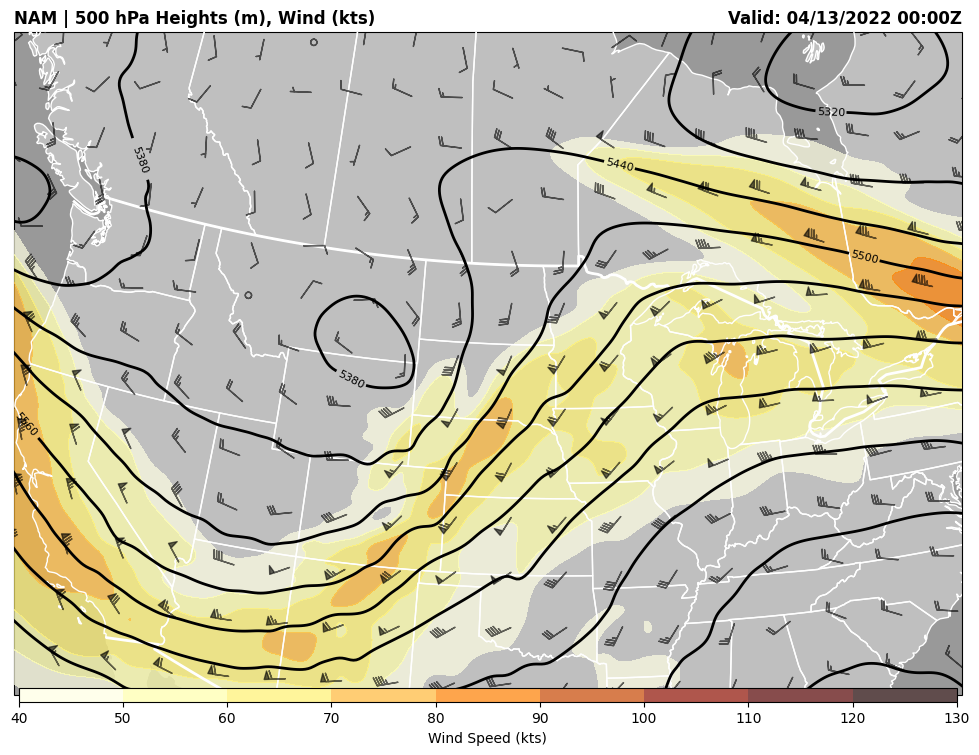

In [ ]:
#################################
# BUILD MAP FIGURE AND AXIS
#################################
# build the figure (`fig`) and axis (`ax`) for our map using
# the `build_map()` function defined above
fig, ax = build_map()




#################################
# SLICE THE DATA FOR THE DESIRED LEVEL
#################################
# use `np.where()` to find "where" the `pres_levels` array equals 500 (hPa)
# the "where", or "index" of this value is saved as `plev500`, then we index our data with it!
plev500 = np.where(pres_levs == 500)[0][0]

# extract 500hPa geopotential height, u-wind, and v-wind
# hint: use code from the 300 hPa plot to help code the lines below
ghgt_500 = ???
uwnd_500 = ???
vwnd_500 = ???

# compute the 500 hPa wind speed with the u & v components of the 500 hPa wind
wdsp_500 = ???




#################################
# PLOT DATA ON THE MAP
#################################
# basic contour
contour = ax.contour(lons, lats, ghgt_500, np.arange(4000, 6000, 60),
                colors='black', linewidths=2.0, linestyles='-',
                transform=ccrs.PlateCarree(), zorder=11)
plt.clabel(contour, fontsize=8, inline=1, inline_spacing=10, fmt='%i',
           rightside_up=True, use_clabeltext=True)


# filled contour
contourf = ax.contourf(lons, lats, wdsp_500, np.arange(40, 140, 10),
                 cmap='afmhot_r', alpha=0.7,
                 transform=ccrs.PlateCarree(), zorder=4)


# wind barbs
every = 20
barbs = ax.barbs(lons[0::every, 0::every], lats[0::every, 0::every],
                uwnd_500[0::every, 0::every], vwnd_500[0::every, 0::every],
                length=5.5, alpha=0.6, transform=ccrs.PlateCarree(), zorder=11)




#################################
# ADD MAP EXTRAS
#################################
# plot title, add one to the left with model name and data names, add another to the right with time info
ax.set_title(f'{model} | 500 hPa Heights (m), Wind (kts)', loc='left', weight='bold')
ax.set_title(f'Valid: {valid_date}', loc='right', weight='bold')
# colorbar for filled contour
cbar = plt.colorbar(contourf, aspect=70, fraction=0.02, ax=ax, orientation='horizontal', pad=-0.01)
cbar.set_label('Wind Speed (kts)', fontsize=10)

-----

<br>

## **700 hPa Height, Temperature, & Wind**

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


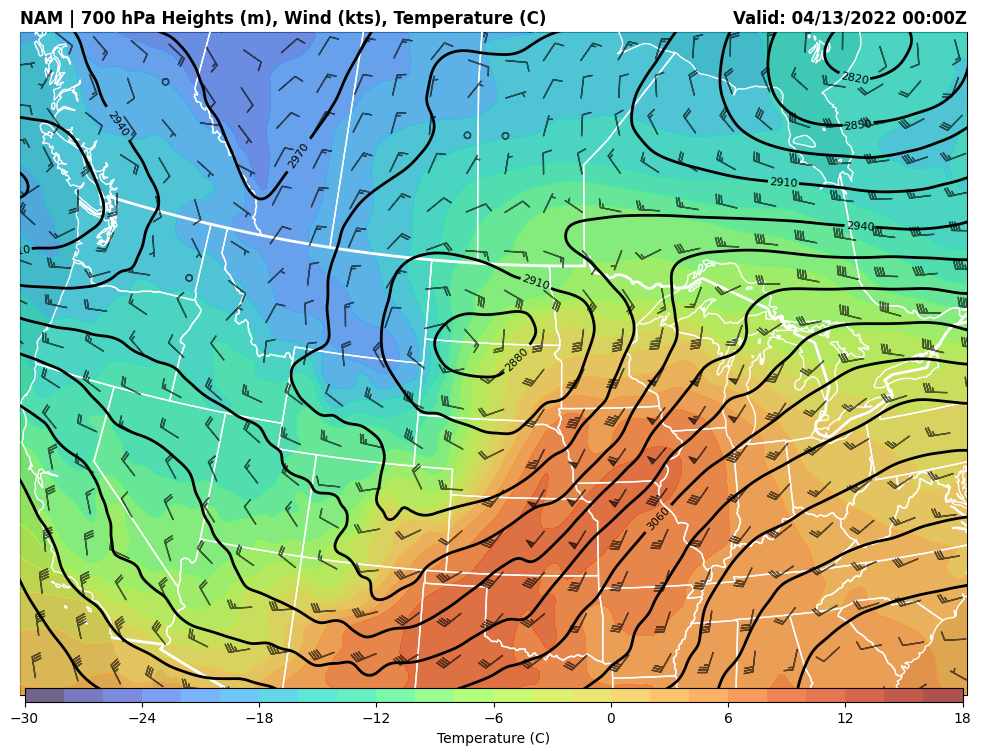

In [ ]:
#################################
# BUILD MAP FIGURE AND AXIS
#################################
# build the figure (`fig`) and axis (`ax`) for our map using
# the `build_map()` function defined above
fig, ax = build_map()




#################################
# SLICE THE DATA FOR THE DESIRED LEVEL
#################################
# use `np.where()` to find "where" the `pres_levels` array equals 700 (hPa)
# the "where", or "index" of this value is saved as `plev700`, then we index our data with it!
# hint: use code from the 300 hPa and 500 hPa plot to help code the lines below
plev700 = ???

# extract 700hPa geopotential height, u-wind, v-wind, and temperature
ghgt_700 = ???
uwnd_700 = ???
vwnd_700 = ???
temp_700 = ???





#################################
# PLOT DATA ON THE MAP
#################################
# basic contour
contour = ???
# add contour labels
plt.clabel(???)


# filled contour
contourf = ax.contourf(lons, lats, temp_700, np.arange(-30, 20, 2),
                 cmap='turbo', alpha=0.7,
                 transform=ccrs.PlateCarree(), zorder=4)


# wind barbs
every = 15
barbs = ax.barbs(lons[0::every, 0::every], lats[0::every, 0::every],
                uwnd_700[0::every, 0::every], vwnd_700[0::every, 0::every],
                length=5.5, alpha=0.6, transform=ccrs.PlateCarree(), zorder=11)




#################################
# ADD MAP EXTRAS
#################################
# plot title, add one to the left with model name and data names, add another to the right with time info
ax.set_title(f'{model} | 700 hPa Heights (m), Wind (kts), Temperature (C)', loc='left', weight='bold')
ax.set_title(f'Valid: {valid_date}', loc='right', weight='bold')
# colorbar for filled contour
cbar = plt.colorbar(contourf, aspect=70, fraction=0.02, ax=ax, orientation='horizontal', pad=-0.01)
cbar.set_label('Temperature (C)', fontsize=10)

-----

<br>

## **Surface Temperature, MSLP, Wind**

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


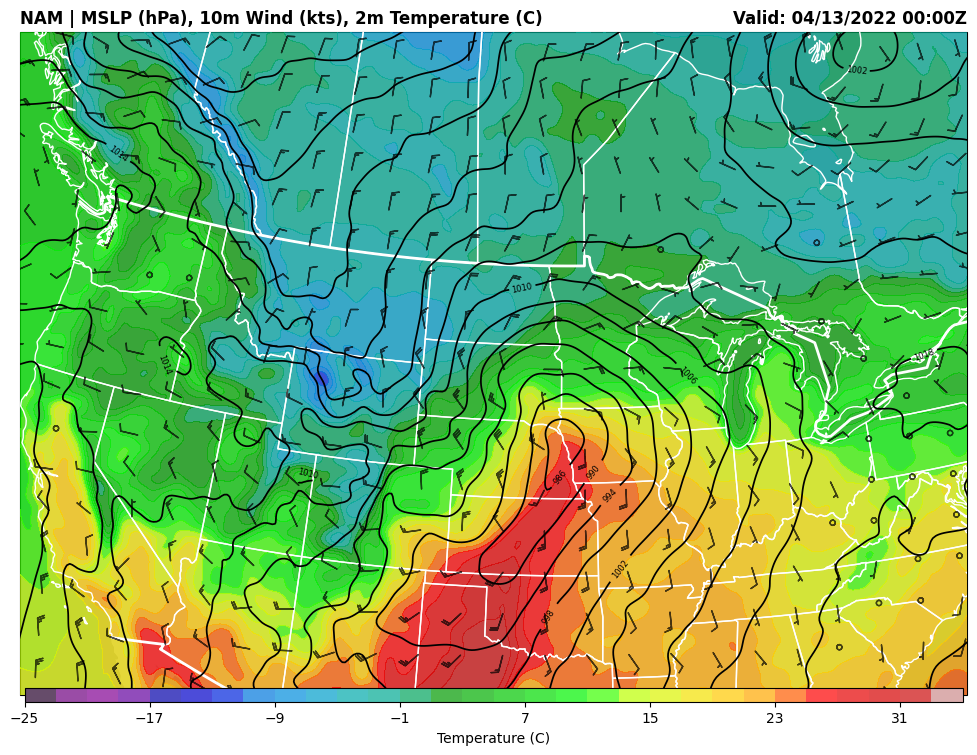

In [ ]:
#################################
# BUILD MAP FIGURE AND AXIS
#################################
# build the figure (`fig`) and axis (`ax`) for our map using
# the `build_map()` function defined above
fig, ax = build_map()


# no need to slice our surface data because it comes without a vertical coordinate
# i.e., its already 'sliced' for the surface level!



#################################
# PLOT DATA ON THE MAP
#################################
# basic contour
# hint: continue to use code from previous plotting code (300, 500, and 700 hPa)
# to help fill in the missing code below
contour = ???
# add contour labels
plt.clabel(???)


# filled contour
contourf = ???


# wind barbs
every = ???
barbs = ax.barbs(???)




#################################
# ADD MAP EXTRAS
#################################
# plot title, add one to the left with model name and data names, add another to the right with time info
ax.set_title(???)
ax.set_title(???)
# colorbar for filled contour
cbar = plt.colorbar(???)
cbar.set_label(???)

-----

<br>

## **Surface Dewpoint, MSLP, Wind**

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


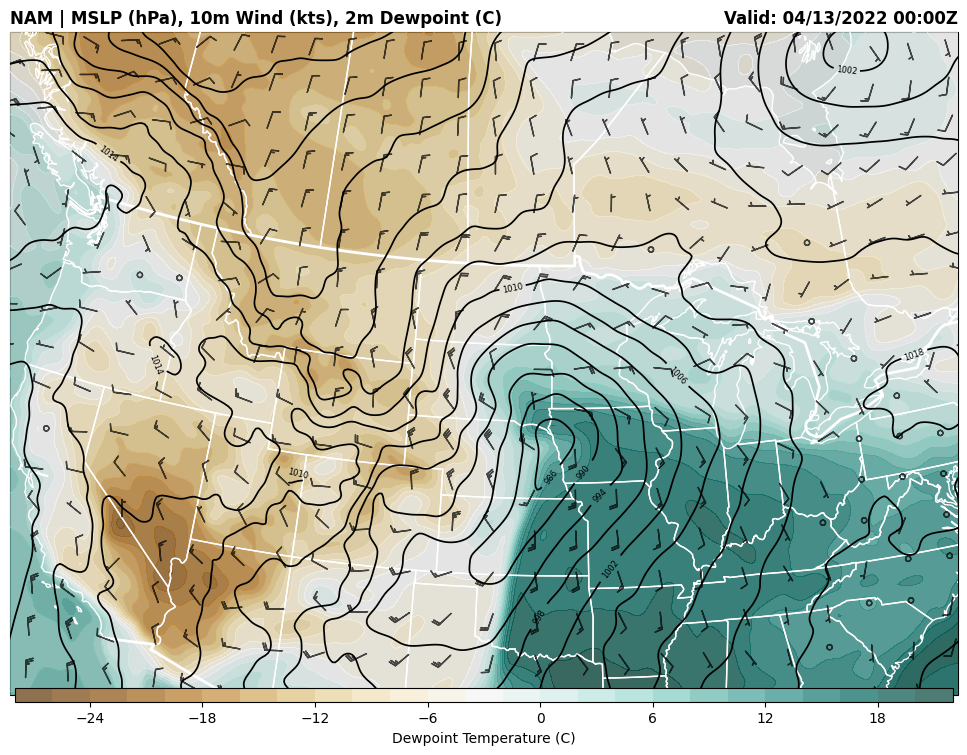

In [ ]:
#################################
# BUILD MAP FIGURE AND AXIS
#################################
# build the figure (`fig`) and axis (`ax`) for our map using
# the `build_map()` function defined above
fig, ax = build_map()


# no need to slice our surface data because it comes without a vertical coordinate
# i.e., its already 'sliced' for the surface level!



#################################
# PLOT DATA ON THE MAP
#################################
# basic contour
contour = ???
# add contour labels
plt.clabel(???)

# filled contour
contourf = ???


# wind barbs
every = ???
barbs = ax.barbs(???)




#################################
# ADD MAP EXTRAS
#################################
# plot title, add one to the left with model name and data names, add another to the right with time info
ax.set_title(???)
ax.set_title(???)
# colorbar for filled contour
cbar = plt.colorbar(???)
cbar.set_label(???)

-----

<br>

## **Composite Reflectivity, MSLP, 10m Wind**

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


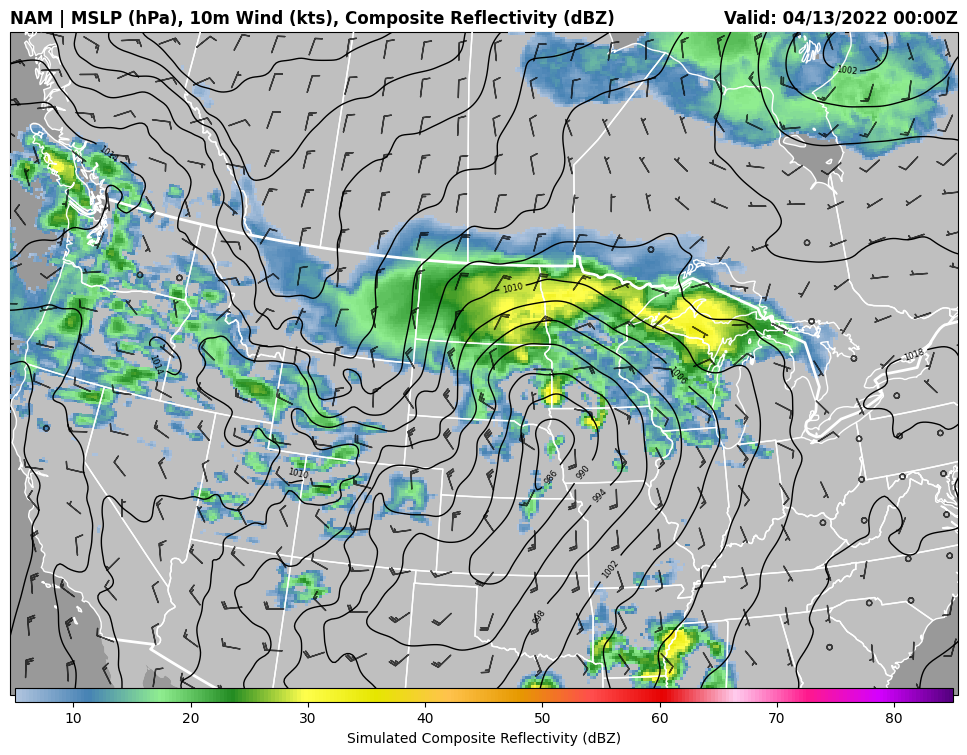

In [ ]:
#################################
# BUILD MAP FIGURE AND AXIS
#################################
# build the figure (`fig`) and axis (`ax`) for our map using
# the `build_map()` function defined above
fig, ax = build_map()


# no need to slice our surface data because it comes without a vertical coordinate
# i.e., its already 'sliced' for the surface level!


#################################
# CREATE A SPECIAL COLORMAP
#################################
# Above we were able to use native matplotlib colormaps for ease. However for some data, especially in meteorology, there are 'standards' (spoken or unspoken)
# for how the data is displayed. Let's make a special colormap for our Composite Reflectivity plot that mimics the NWS reflectivity colortable.
# We can do this using `matplotlib`'s `LinearSegmentedColormap.from_list()` function, which allows us to build a custom colormap from a list of colors!
from matplotlib.colors import LinearSegmentedColormap
radar_cmap  = LinearSegmentedColormap.from_list('custom_cmap',['lightsteelblue','steelblue','lightgreen','forestgreen',
                                                [255/255,255/255,77/255],[230/255,230/255,0],[255/255,195/255,77/255],[230/255,153/255,0],
                                                 [255/255,77/255,77/255],[230/255,0,0],[255/255,204/255,238/255],[255/255,25/255,140/255],
                                                  [212/255,0,255/255],[85/255,0,128/255]],N=256)

#################################
# PLOT DATA ON THE MAP
#################################
# hint: use pieces of code from all of your prior figures to help write code for this final figure!
# basic contour for surface pressure
???

# add contour labels for surface pressure
???

# filled contour
# contourf = ax.contourf(lons, lats, rfct, np.arange(10, 80, 2),
#                  cmap=radar_cmap, alpha=1,
#                  transform=ccrs.PlateCarree(), zorder=4)

# add a 'colormesh' -- a colormesh is another way to plot data on a map
# a `matplotlib` `pcolormesh` fills data grid cells based on value, its much faster than a filled contour
# hint: instead of using ax.contour, use ax.pcolormesh to plot radar reflectivity
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html
pcolormesh = ???


# wind barbs
???




#################################
# ADD MAP EXTRAS
#################################
# plot title, add one to the left with model name and data names, add another to the right with time info
ax.set_title(???)
ax.set_title(???)
# colorbar for filled contour
cbar = plt.colorbar(???)
cbar.set_label(???)